<a href="https://colab.research.google.com/github/Anantika0410/Mini-Project/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -q -O 100.dat https://physionet.org/files/mitdb/1.0.0/100.dat?download
!wget -q -O 100.hea https://physionet.org/files/mitdb/1.0.0/100.hea?download


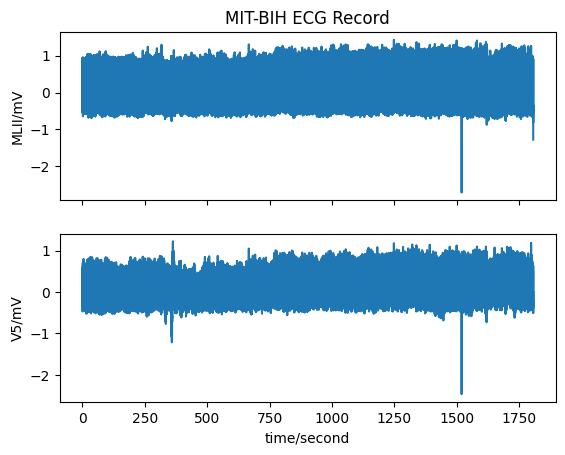

In [ ]:
import wfdb
# Read the record again
record = wfdb.rdrecord('100')
wfdb.plot_wfdb(record=record, title='MIT-BIH ECG Record')


Data shape: (5000, 140, 1), Labels shape: (5000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 140, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 140, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.4971 - loss: 0.6935 - val_accuracy: 0.4950 - val_loss: 0.6953
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.5161 - loss: 0.6930 - val_accuracy: 0.5025 - val_loss: 0.6936
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 141ms/step - accuracy: 0.5025 - loss: 0.6936 - val_accuracy: 0.4725 - val_loss: 0.6938
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - accuracy: 0.4949 - loss: 0.6933 - val_accuracy: 0.4675 - val_loss: 0.6940
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.5051 - loss: 0.6929 - val_accuracy: 0.4650 - val_loss: 0.6953
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 144ms/step - accuracy: 0.5226 - loss: 0.6923 - val_accuracy: 0.4775 - val_loss: 0.6963
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.5185 - loss: 0.6928 - val_accuracy: 0.4525 - val_loss: 0.6977
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - accuracy: 0.5190 - loss: 0

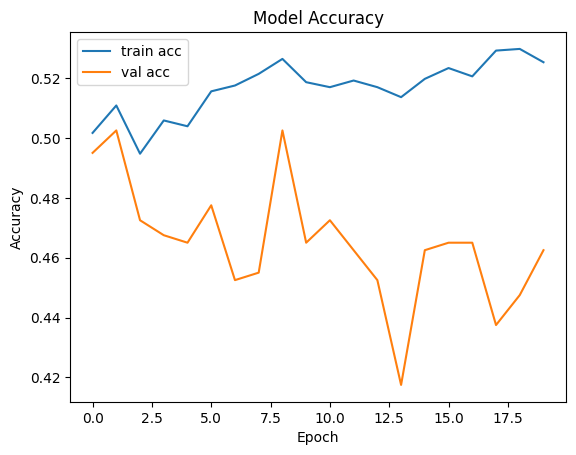

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step

Test Accuracy: 0.4820


In [ ]:

!pip install -q tensorflow

# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Simulate ECG dataset (for demo purposes)
# Let's assume 5000 samples, each sample is 140 timesteps (like MIT-BIH ECG data), 1 feature (amplitude)
# 0 = normal, 1 = early heart disease
num_samples = 5000
timesteps = 140
features = 1

X = np.random.randn(num_samples, timesteps, features)  # random ECG-like signal
y = np.random.randint(0, 2, size=(num_samples,))        # binary labels

print(f"Data shape: {X.shape}, Labels shape: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(timesteps, features), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate on test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Accuracy
test_acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_acc:.4f}")
